Model executed 1 scenarios in 0.4 seconds, running at 1165.2 timesteps per second.


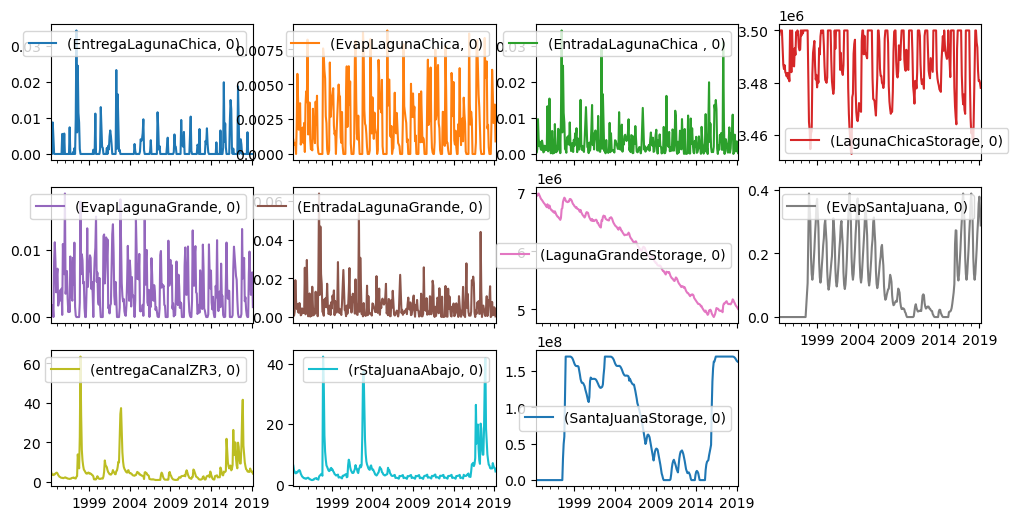

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [87]:
from pywr.core import Model
from pywr.recorders import Recorder
from pywr.recorders._recorders import NodeRecorder
from pywr.notebook import draw_graph
from pywr.notebook import pywr_model_to_d3_json
from pywr.notebook import to_html
import matplotlib.pyplot as plt

if __name__ == "__main__":

    modelo="huasco.json"
    m = Model.load(modelo)
    m.solver.name="glpk-edge"
    stats = m.run()
    print(stats)

    df = m.to_dataframe()
    colsQ=[x for x in df.columns if 'Storage' not in x[0]]
#     pasar a m3/s
    df[colsQ]=df[colsQ]/86400.
    df.plot(subplots=True, figsize = (12,6),layout=(3,4))
    plt.show()
    
    plt.figure()
    draw_graph(m,labels = True, attributes = True,width=900,height=900)
    plt.show()


In [88]:
from pywr.notebook import to_html
to_html(m,height=800,width=800,labels=True,attributes=True,title='Modelo Cuenca del Río Huasco')

In [89]:
from pywr.notebook import pywr_model_to_d3_json
d3json=pywr_model_to_d3_json(m)
import json
with open("./d3.json", "w") as fp:
    json.dump(d3json,fp) 